# Colates, cleans and analyses canopy temperature data from Rain shelter wheat trail

In [195]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline
import matplotlib.dates as mdates
import GraphHelpers as GH

In [196]:
Data = pd.read_pickle('.\DataFrames\TempAndRadnCleaned.pkl')
Data.columns = Data.columns.droplevel(level=[3,4,5,6])
Data.sort_index(axis=1, inplace = True)
Data.sort_index(inplace = True)

#Add surface temperature difference (TsTa) into DataFrame
Data = Data.join(pd.concat([np.subtract(Data.loc[:,'IR_SurfaceTemp'], Data.loc[:,'AirTemperature'].values)], #Subtract Ts from Ta to get the differeince
          axis=1,keys=['TsTa'],names=['Measurement']),sort=True) # Join a descriptor level into the index

Ic = 0.8
Icl = 0.9
Cp = 1013 #Heat capacity of air Joule/kg/oC
Albedo = 0.23
Lattitude = -43.38
LongitudeTZ = 185
LongitudeML = 360 - 172.28

In [197]:
Data

Measurement         AboveCanopyPAR AirTemperature BatteryVoltage  \
Irrigation                    Expt           Expt           Expt   
Cultivar                      Expt           Expt           Expt   
Block                         Expt           Expt           Expt   
2018-11-12 15:00:00       1069.000           19.4          13.65   
2018-11-12 15:10:00        948.500           19.5          13.79   
2018-11-12 15:20:00        830.500           19.7          13.70   
2018-11-12 15:30:00        686.800           19.7          13.53   
2018-11-12 15:40:00        650.800           19.8          14.01   
2018-11-12 15:50:00        585.500           20.1          13.84   
2018-11-12 16:00:00        599.600           19.6          13.90   
2018-11-12 16:10:00        743.700           18.5          13.84   
2018-11-12 16:20:00       1027.000           18.4          13.63   
2018-11-12 16:30:00        914.500           17.9          13.48   
2018-11-12 16:40:00        870.500           17.4          13.75   
2018-11-12 16:50:00        841.000           17.1          13.78   
2018-11-12 17:00:00        644.050           16.8          13.58   
2018-11-12 17:10:00        371.600           16.5          13.76   
2018-11-12 17:20:00        295.000           16.3          13.84   
2018-11-12 17:30:00        235.350           15.9          13.77   
2018-11-12 17:40:00        216.250           15.6          13.67   
2018-11-12 17:50:00        191.500           15.5          13.62   
2018-11-12 18:00:00        179.100           15.6          13.61   
2018-11-12 18:10:00        161.650           15.7          13.54   
2018-11-12 18:20:00        146.400           15.9          13.50   
2018-11-12 18:30:00        139.100           15.9          13.51   
2018-11-12 18:40:00        135.200           15.8          13.44   
2018-11-12 18:50:00        135.200           15.7          13.43   
2018-11-12 19:00:00        128.950           15.5          13.46   
2018-11-12 19:10:00        158.800           14.9          13.42   
2018-11-12 19:20:00        188.150           14.7          13.45   
2018-11-12 19:30:00        132.400           14.4          13.49   
2018-11-12 19:40:00        115.500           14.1          13.44   
2018-11-12 19:50:00         85.650           13.7          13.41   
...                            ...            ...            ...   
2019-03-26 03:20:00          0.000           21.2          13.06   
2019-03-26 03:30:00          0.000           21.2          13.05   
2019-03-26 03:40:00          0.000           21.0          13.05   
2019-03-26 03:50:00          0.000           21.2          13.06   
2019-03-26 04:00:00          0.000           21.2          13.03   
2019-03-26 04:10:00          0.000           21.1          13.04   
2019-03-26 04:20:00          0.000           21.1          13.05   
2019-03-26 04:30:00          0.000           21.2          13.04   
2019-03-26 04:40:00          0.000           21.2          13.00   
2019-03-26 04:50:00          0.000           21.2          13.06   
2019-03-26 05:00:00          0.000           21.1          13.03   
2019-03-26 05:10:00          0.000           20.6          13.03   
2019-03-26 05:20:00          0.000           20.5          13.03   
2019-03-26 05:30:00          0.000           20.5          13.03   
2019-03-26 05:40:00          0.000           20.6          13.03   
2019-03-26 05:50:00          0.000           21.3          13.05   
2019-03-26 06:00:00          0.000           21.7          13.03   
2019-03-26 06:10:00          0.000           22.0          13.03   
2019-03-26 06:20:00          8.447           21.9          13.04   
2019-03-26 06:30:00         14.080           22.2          13.02   
2019-03-26 06:40:00       3731.500           22.6          13.02   
2019-03-26 06:50:00       1739.500           22.6          13.04   
2019-03-26 07:00:00       1631.500           22.4          13.01   
2019-03-26 07:10:00       1461.000           22.0       

In [198]:
GPs = GH.SetGraphicsPatterns(Data.IR_SurfaceTemp.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

Start = Data.index.min()
End = Data.index.max()

Irrigation
['Dry', 'Irrigated']
Cultivar
['Karaka', 'Moonlight', 'RussetB']
Treatments
MultiIndex(levels=[['Dry', 'Irrigated'], ['Karaka', 'Moonlight', 'RussetB']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
                    Lin     Col   Alp Mar     MFC
Dry       Karaka      -  orange  0.15   o  orange
          Moonlight   -   green  0.15   o   green
          RussetB     -  purple  0.15   o  purple
Irrigated Karaka     --  orange  0.45   ^   white
          Moonlight  --   green  0.45   ^   white
          RussetB    --  purple  0.45   ^   white


## Look at treatment patterns of surface temp differential

In [199]:
Start = '2018-11-30'
End = '2018-12-8'

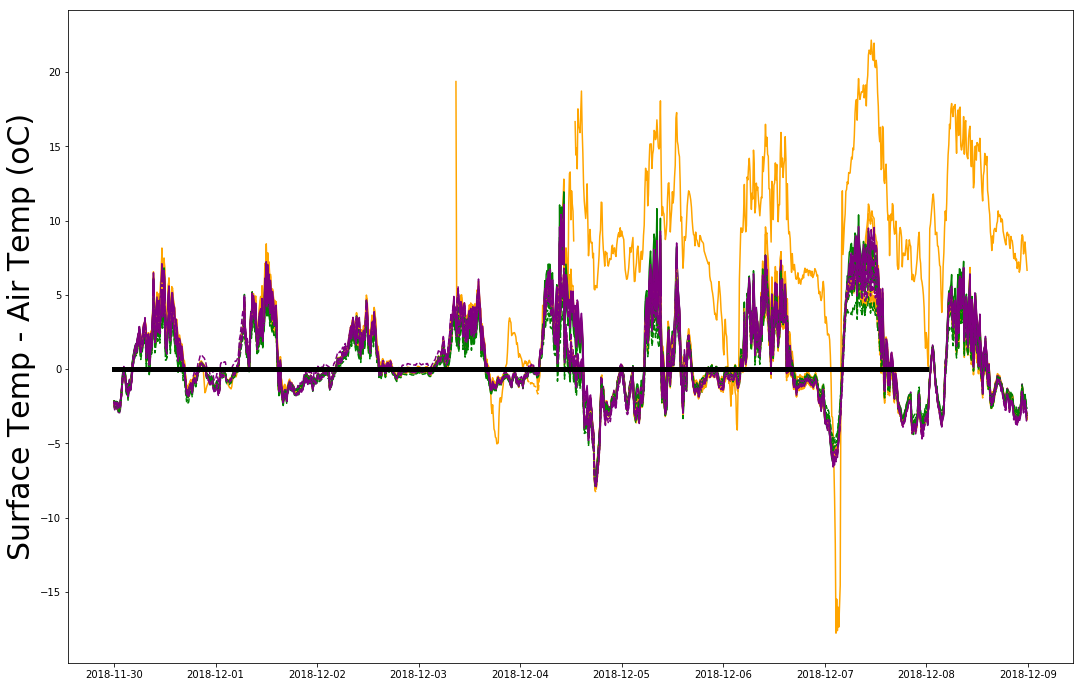

In [200]:
Figure = plt.figure(figsize=(18, 12))
ax = Figure.add_subplot(1,1,1)
GH.AddIndexedPlot(Data.TsTa.loc[Start:End],ax,GPs,1.5)
plt.ylabel('Surface Temp - Air Temp (oC)', fontsize=30);
plt.plot(pd.to_datetime([Start,End]),[0,0], c='k', linewidth=5)

### The temperature differences are comming mostly during the day time but they are non zero at night and some treatment differences remain so will will remove the night time data from our daily means

## Set up a mask for day-light hours and filter out all data after dark

### First look at the radiation data

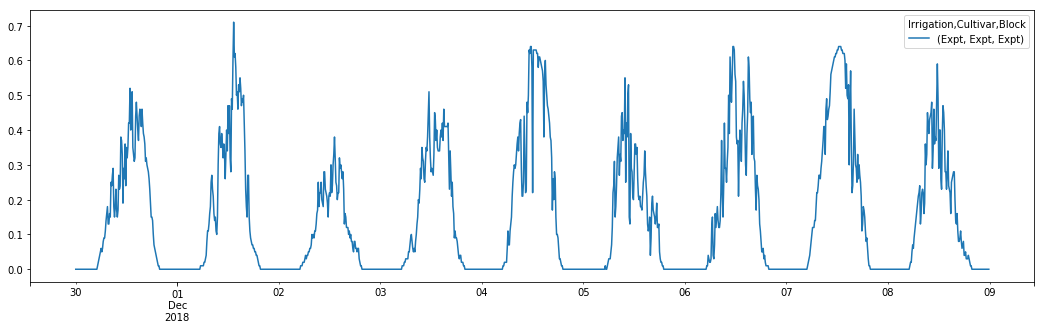

In [201]:
Data.IncomingRadnMJ.loc[Start:End].plot(figsize=(18,5))

### Values less that 0.002 MJ/h can be treated as dark

### Create a tuple of the time stamps that have radiation > 0.002 MJ/h

In [202]:
DaylightIndex = Data.IncomingRadnMJ.where(Data.IncomingRadnMJ>0.002)
DaylightIndex.dropna(inplace=True)
DaylightIndex = DaylightIndex.index.tolist()

In [204]:
np.save('.\DataFrames\DaylightIndex.npy',DaylightIndex)

### Create temperature dataframes with daylight data

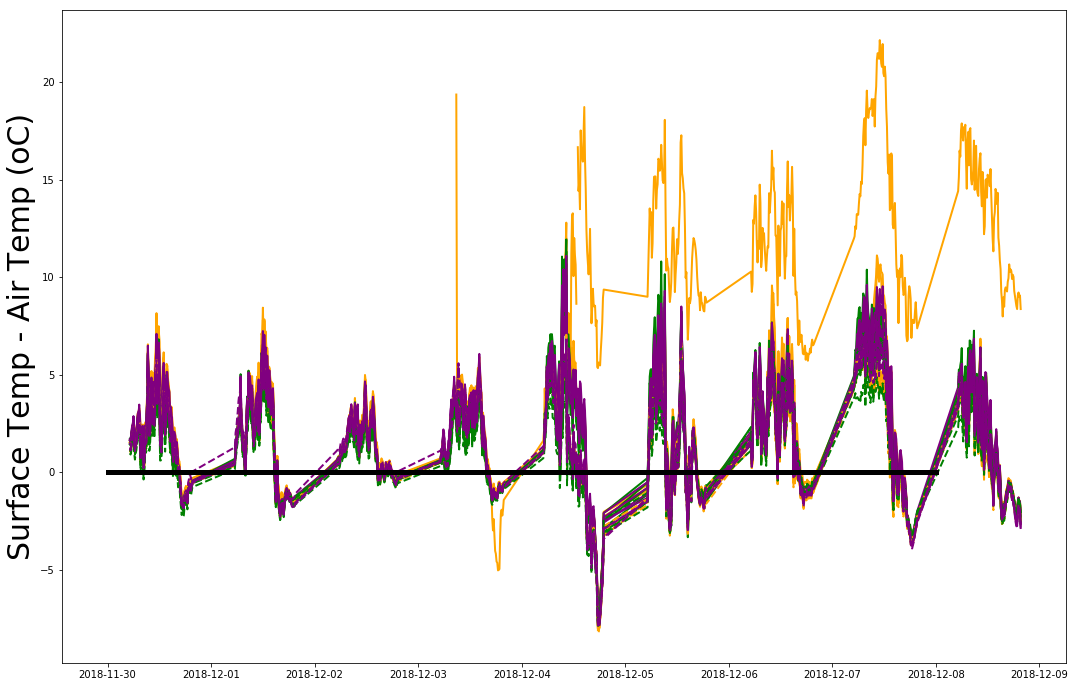

In [205]:
Figure = plt.figure(figsize=(18, 12))
ax = Figure.add_subplot(1,1,1)
GH.AddIndexedPlot(Data.loc[DaylightIndex,'TsTa'].loc[Start:End],ax,GPs,2)
plt.ylabel('Surface Temp - Air Temp (oC)', fontsize=30);
plt.plot(pd.to_datetime([Start,End]),[0,0], c='k', linewidth=5)

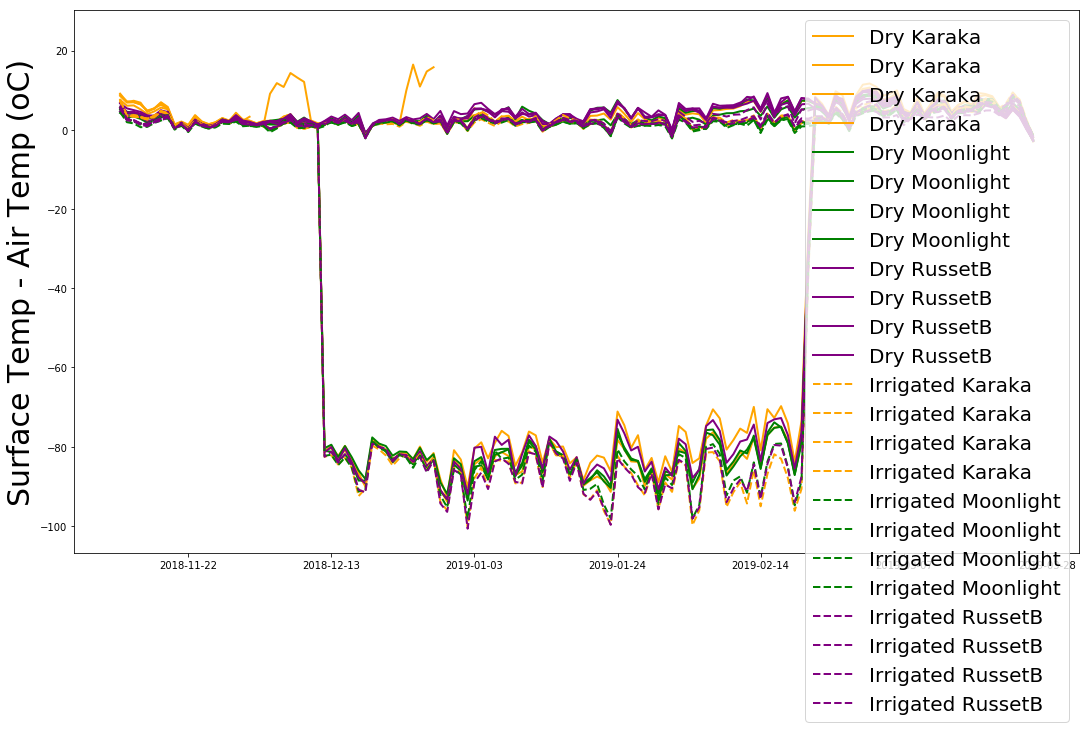

In [206]:
#Agregate data
DayTimeMeanTempDiff = Data.loc[DaylightIndex,'TsTa'].resample('D').mean()
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(DayTimeMeanTempDiff.loc['2018-10-01':'2019-05-10',:],ax,GPs,2)
plt.ylabel('Surface Temp - Air Temp (oC)', fontsize=30);
plt.legend(loc=1,fontsize=20)

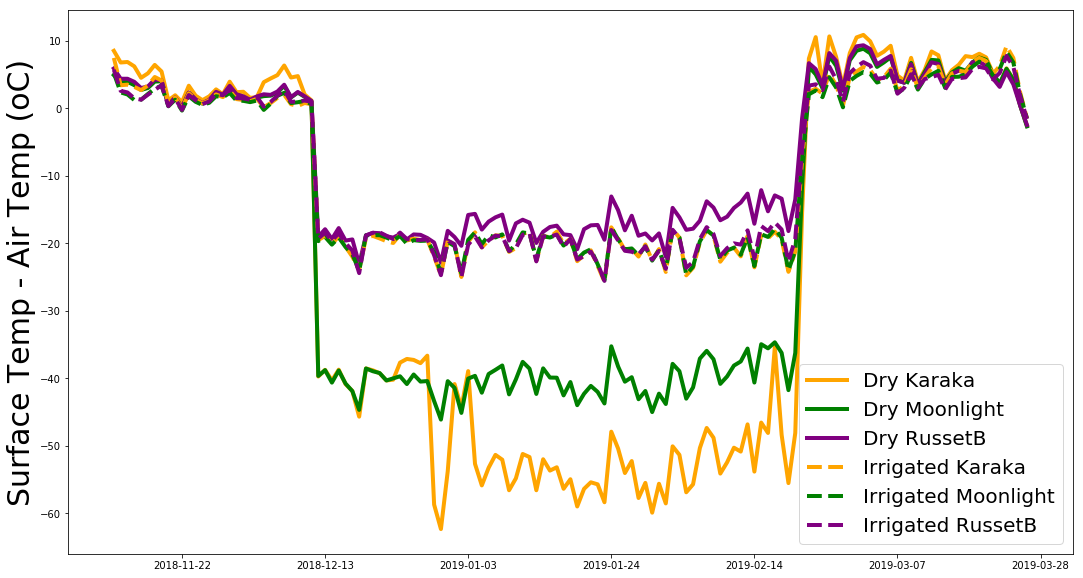

In [207]:
#Agregate data
DayTimeMeanTempDiff = DayTimeMeanTempDiff.groupby(level=['Irrigation','Cultivar'],axis=1).mean()
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlot(DayTimeMeanTempDiff,ax,GPs,4)
plt.ylabel('Surface Temp - Air Temp (oC)', fontsize=30);
plt.legend(fontsize=20)

In [208]:
DrylandIndex = pd.to_datetime(['2015-10-13', '2015-11-02', '2015-11-19', '2015-12-24',
               '2016-02-03', '2016-02-04'])
HighIrrigIndex = pd.to_datetime(['2015-10-13', '2015-10-29', '2015-11-02', '2015-11-06',
               '2015-11-12', '2015-11-19', '2015-11-26', '2015-12-03',
               '2015-12-24', '2015-12-31', '2016-01-07'])

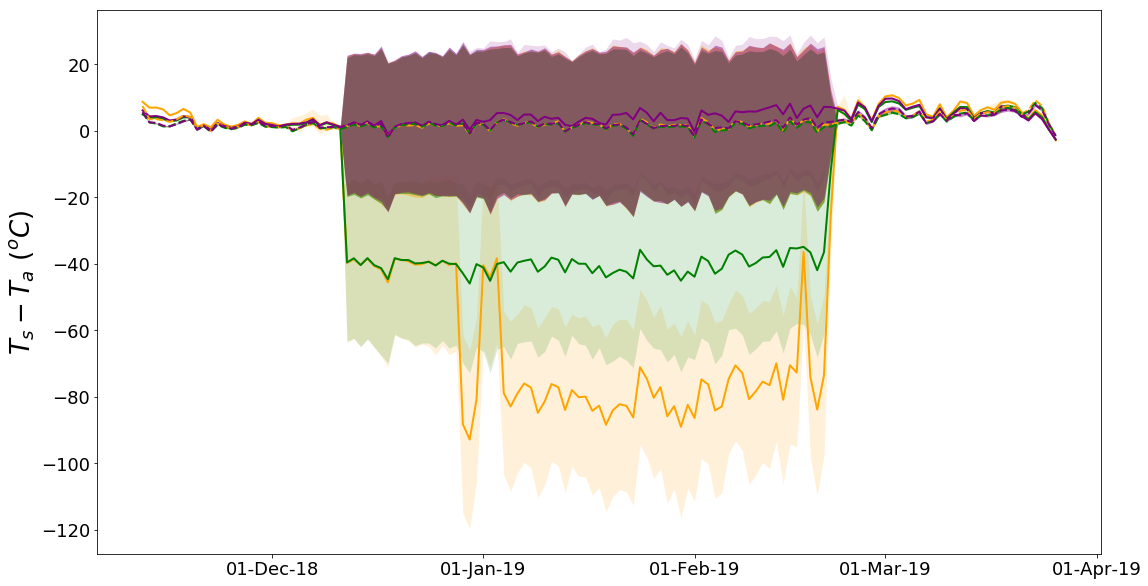

In [209]:
Graph = plt.figure(figsize=(18,10))
ax = Graph.add_subplot(1,1,1)
GH.AddIndexedPlotWithSEM(Data.loc[DaylightIndex,'TsTa'].resample('D').mean(),ax,GPs,2)
plt.ylabel('$T_s - T_a$ $(^oC)$', fontsize=26, weight='bold')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax.tick_params(labelsize=18)    
#ax.plot(HighIrrigIndex,list(-4.8 for x in range(len(HighIrrigIndex))),'^',mec='k',mfc='w',markersize=16)
#ax.plot(DrylandIndex,list(-4.1 for x in range(len(DrylandIndex))),'^',c='k',markersize=16)

In [210]:
DayTimeMeanTempDiff.to_pickle('.\DataFrames\DayTimeMeanSurfaceTemp.pkl')

# Calculate additional variables

## Aerodynamic resistance (Ra)

In [211]:
Data.loc[:,('Ra','Expt', 'Expt','Expt')] = [et.Ra(Data.loc[x,'Windspeed'].values[0],1.2, 0.5) for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


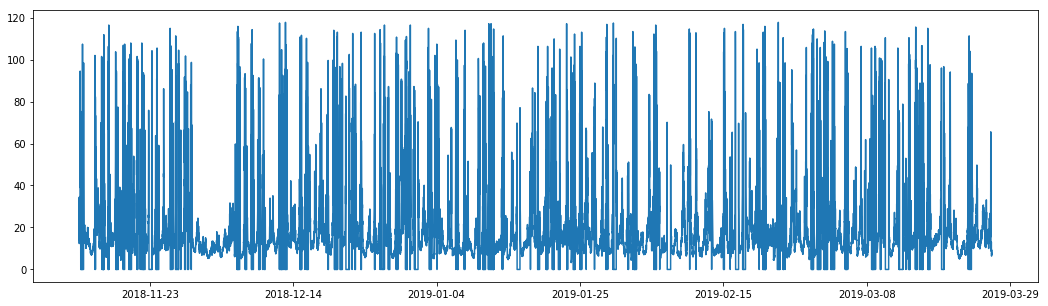

In [212]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.Ra)

## Saturated Vapor pressure (SatVP)

In [213]:
#Function returns SatVP in mbar.  Divide by 10 to convert to kPa
Data.loc[:,('SatVP','Expt', 'Expt','Expt')] = [et.saturated_vapor_pressure(Data.loc[x,'AirTemperature'].values[0])/10 for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


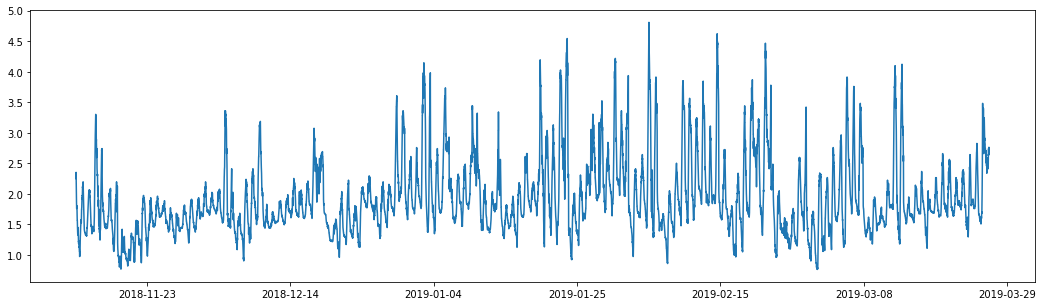

In [214]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.SatVP)

## Vapor pressure (VP)

In [215]:
Data.loc[:,('VP', 'Expt', 'Expt','Expt')] = [Data.loc[x,'SatVP'].values[0] * Data.loc[x,'RelativeHumidity'].values[0]/100 for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


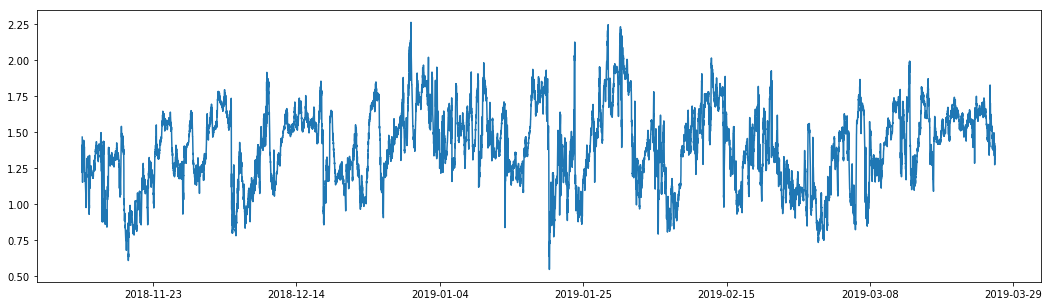

In [216]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.VP)

## Vapor pressure deficit (VPD)

In [217]:
Data.loc[:,('VPD', 'Expt', 'Expt','Expt')] = [Data.loc[x,'SatVP'].values[0] - Data.loc[x,'VP'].values[0] for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


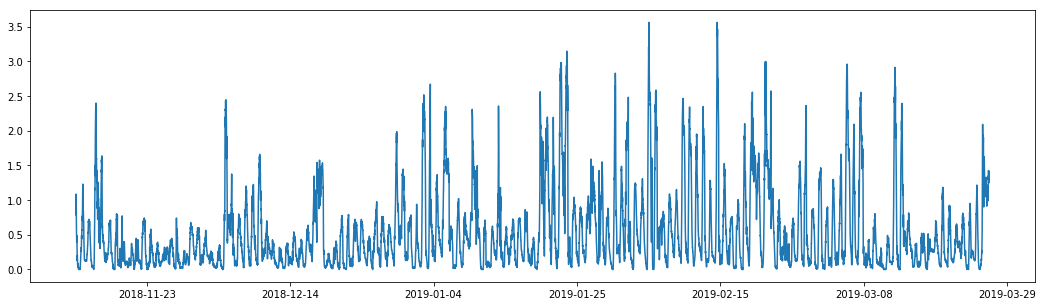

In [218]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.VPD)

Text(0.5,0,'Air Temperature oC')

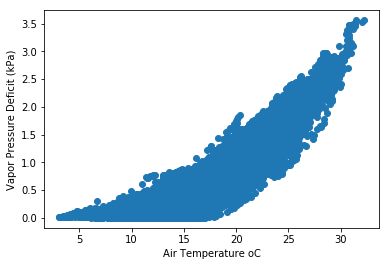

In [219]:
plt.plot (Data.AirTemperature, Data.VPD,'o')
plt.ylabel('Vapor Pressure Deficit (kPa)')
plt.xlabel('Air Temperature oC')

### VPD response to temperature is showing the sort of exponential relationship we would expect

## AirDensity (q)

In [220]:
Data.loc[:,('q','Expt','Expt','Expt')] = [et.AirDensity(Data.loc[x,'AirTemperature'].values[0]) for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


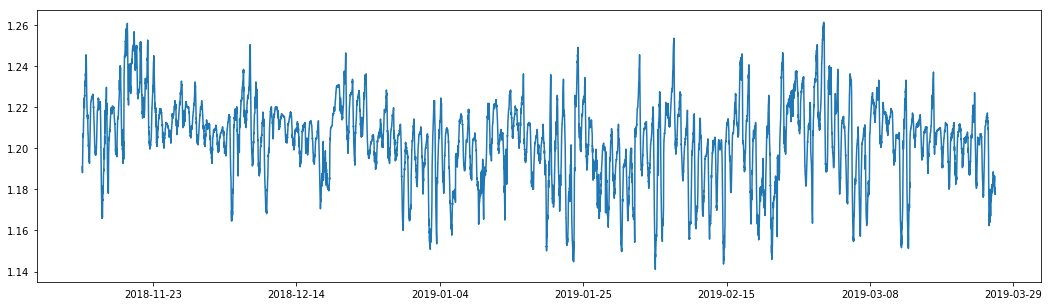

In [221]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.q)

## Phycometric constant (gamma)

In [222]:
Data.loc[:,('gamma','Expt','Expt','Expt')] = [et.gama(Data.loc[x,'AirTemperature'].values[0]) for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


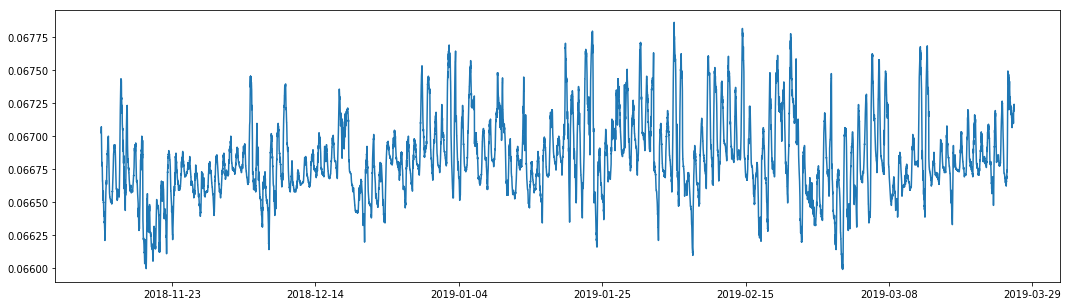

In [223]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.gamma)

## Slope of the satruarted vapour pressure curve (delta)

In [224]:
Data.loc[:,('delta','Expt','Expt','Expt')] = [et.saturated_vapor_pressure_slope(Data.loc[x,'AirTemperature'].values[0]) for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


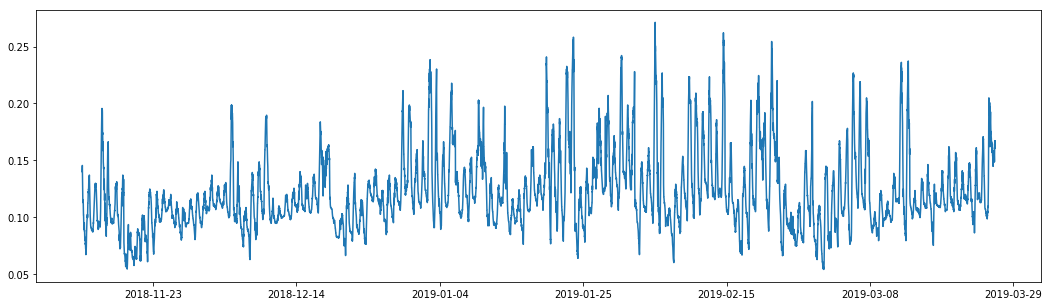

In [225]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.delta)

# latent heat of vaporisation (lamda)

In [226]:
Data.loc[:,('lamda','Expt','Expt','Expt')] = [et.lamda(Data.loc[x,'AirTemperature'].values[0]) for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


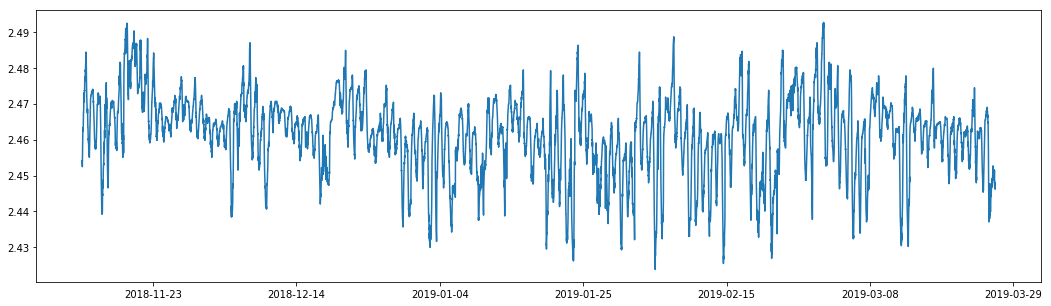

In [227]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.lamda)

## Duration (in hours)

In [228]:
def calcPeriod(End, Start):
    durat = End - Start
    secs = float(durat.seconds)
    _ret = secs/3600
    return _ret
    

In [229]:
Data.loc[:,('Duration','Expt','Expt','Expt')] = [calcPeriod(Data.index[x],Data.index[x-1]) for x in range(Data.index.size)]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


(0, 0.4)

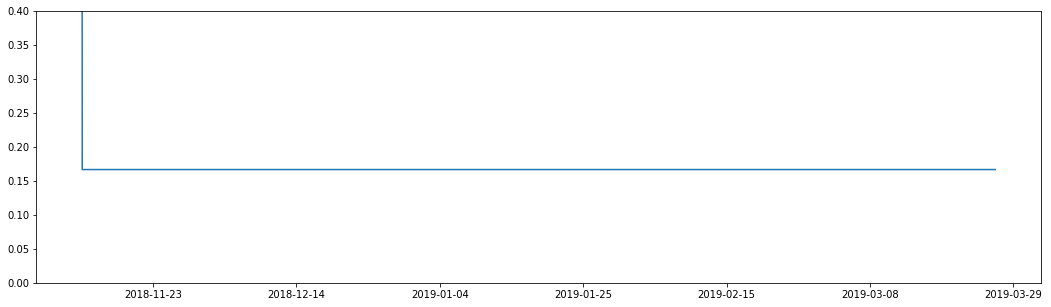

In [230]:
graph = plt.figure(figsize=(18,5))
plt.plot(Data.Duration)
plt.ylim(0,0.4)

## Time (in decimal hour scale, 0-24)

In [231]:
def calcTime(DateTimeOfInterest):
    When = DateTimeOfInterest.to_pydatetime()
    zerohour =  datetime.datetime(When.year, When.month, When.day, 0, 0)
    _hour = When - zerohour
    Hour = float(_hour.seconds)/3600
    _ret = 0
    if Hour >1:
        _ret = Hour-1
    else:
        _ret = 23 + Hour
    return _ret

In [232]:
Data.loc[:,('Time','Expt','Expt','Expt')] = [calcTime(Data.index[x]) for x in range(Data.index.size)]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


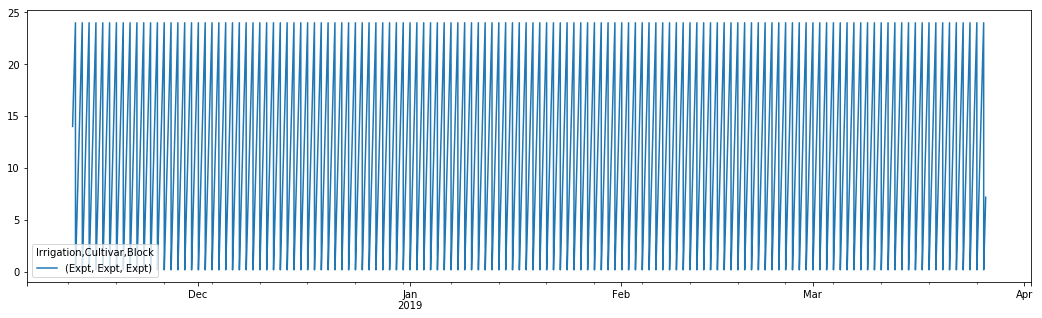

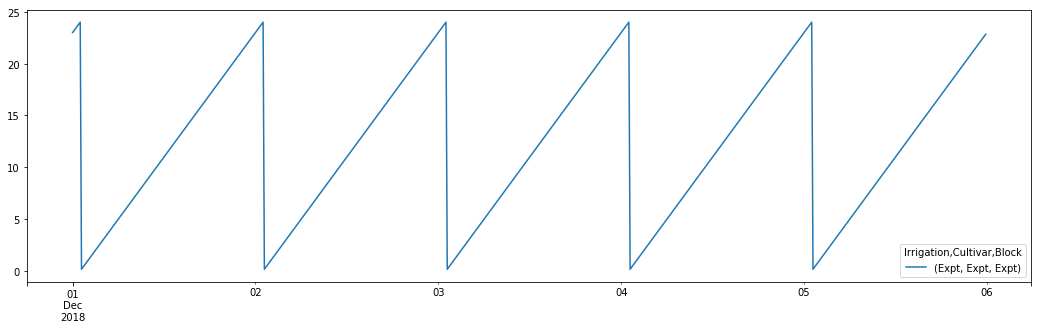

In [233]:
Data.Time.plot(figsize=(18,5))
Data.Time.loc['2018-12-1':'2018-12-5'].plot(figsize=(18,5))

In [234]:
Data.columns

MultiIndex(levels=[['AboveCanopyPAR', 'AirTemperature', 'BatteryVoltage', 'BelowCanopyPAR', 'GlobalRadn', 'IR_SensorBodyTemp', 'IR_SurfaceTemp', 'IRmV', 'IncomingRadnKW', 'IncomingRadnMJ', 'Leafwetness', 'NetRadn', 'PannelTemperature', 'Rainfall', 'Record', 'ReflectedRadn', 'ReflectedRadnKW', 'ReflectedRadnMJ', 'RelativeHumidity', 'SoilHeatFlux', 'SurfaceSoilTemp', 'TsTa', 'Windspeed', 'Ra', 'SatVP', 'VP', 'VPD', 'q', 'gamma', 'delta', 'lamda', 'Duration', 'Time'], ['Dry', 'Expt', 'Irrigated'], ['Expt', 'Karaka', 'Moonlight', 'RussetB'], [1, 2, 3, 4, 'Expt']],
           labels=[[0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17,

## Extrateresteral radiation (Rex)

In [244]:
Data.loc[:,('Rex','Expt','Expt','Expt')] = [et.ExtraterestialRadiation(Lattitude,
                               x.dayofyear,
                               Data.loc[x,'Duration'].values[0],
                               Data.loc[x,'Time'].values[0],
                               LongitudeTZ,
                               LongitudeML) for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


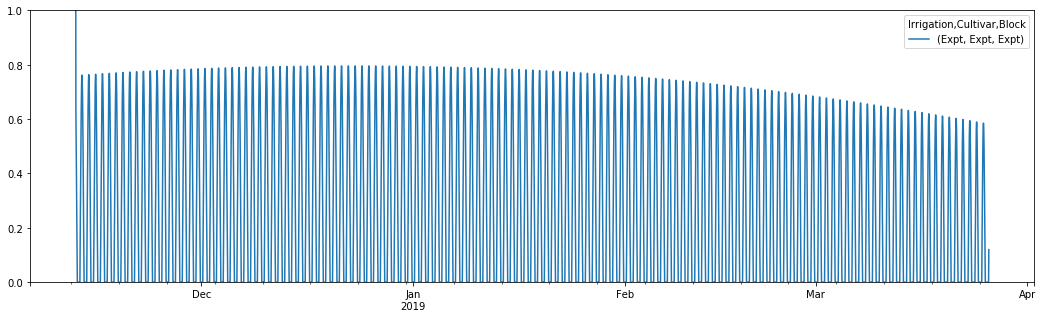

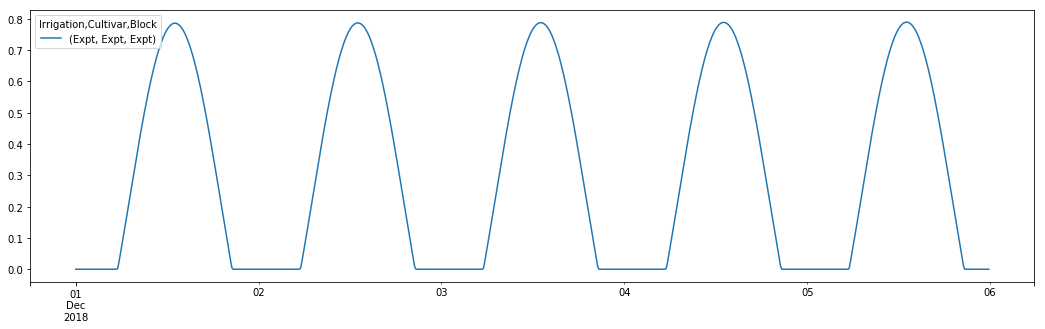

In [246]:
Data.Rex.plot(figsize = (18,5),ylim=(0,1))
Data.Rex.loc['2018-12-1':'2018-12-5'].plot(figsize = (18,5))

## Clear sky radiation (So)

In [248]:
Data.loc[:,('So','Expt','Expt','Expt')] = [et.ClearSkyRadiation(Lattitude,
                               x.dayofyear,
                               Data.loc[x,'Duration'].values[0],
                               Data.loc[x,'Time'].values[0],
                               LongitudeTZ,
                               LongitudeML) for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


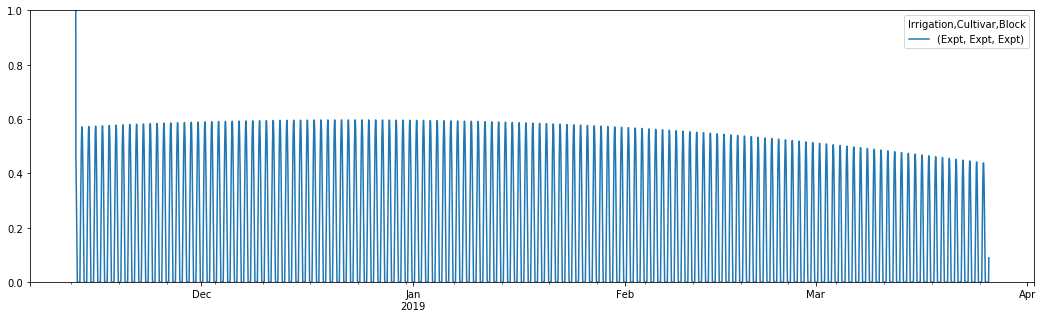

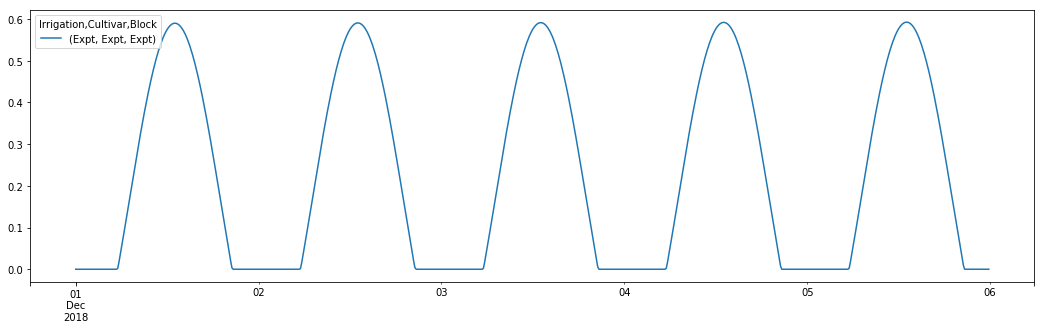

In [250]:
Data.So.plot(figsize = (18,5),ylim=(0,1))
Data.So.loc['2018-12-1':'2018-12-5'].plot(figsize = (18,5))

## Nett Radiation (Rn)

### Calculation Net radiation in MJ/m2

### Bring in plot specific albedo data

In [251]:
Data.loc[:,('RnMJ','Expt','Expt','Expt')] = [et.NetRadiation(Data.loc[x,'IncomingRadnMJ'].values[0],
                              Data.loc[x,'AirTemperature'].values[0],
                              Data.loc[x,'VP'].values[0],
                              Lattitude,
                              x.dayofyear,
                              Data.loc[x,'Duration'].values[0],
                              Data.loc[x,'Time'].values[0],
                              LongitudeTZ,
                              LongitudeML,
                              Albedo) for x in Data.index]

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: PerformanceWarning: indexing past lexsort depth may impact performance.
  self._setitem_with_indexer(indexer, value)


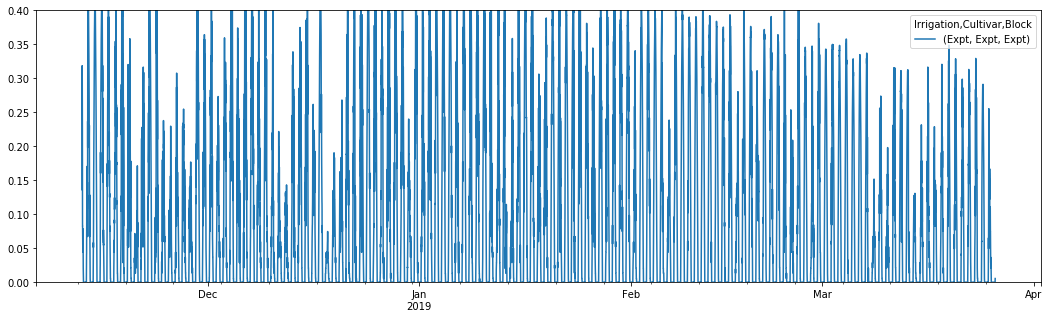

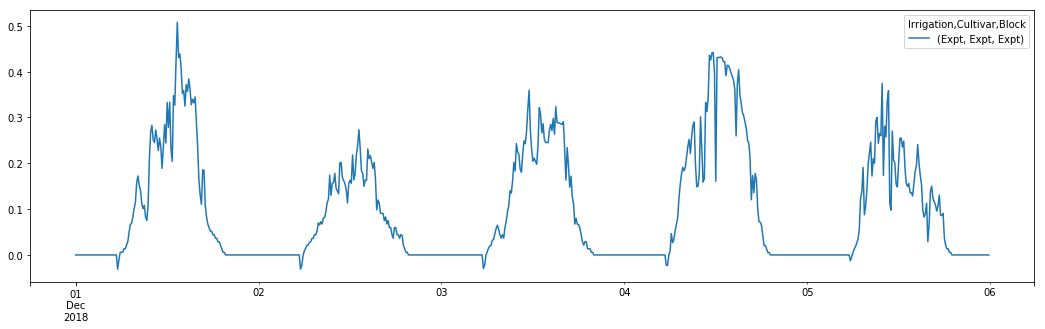

In [252]:
Data.RnMJ.plot(figsize = (18,5),ylim=(0,0.4))
Data.RnMJ.loc['2018-12-1':'2018-12-5'].plot(figsize = (18,5))

Text(0.1,20,'Slope = 0.66')

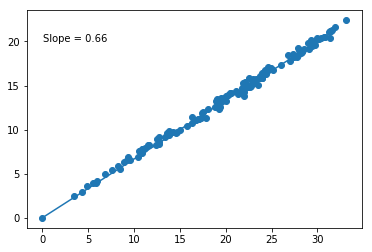

In [253]:
plt.scatter(Data.IncomingRadnMJ.resample('D').sum(),
Data.RnMJ.resample('D').sum())
plt.plot([0,30],[0,20],'-')
plt.text(0.1,20,'Slope = 0.66')

In [263]:
Broadfields = pd.read_pickle('C:\GitHubRepos\Weather\Broadfields\BroadFieldsDaily.pkl')

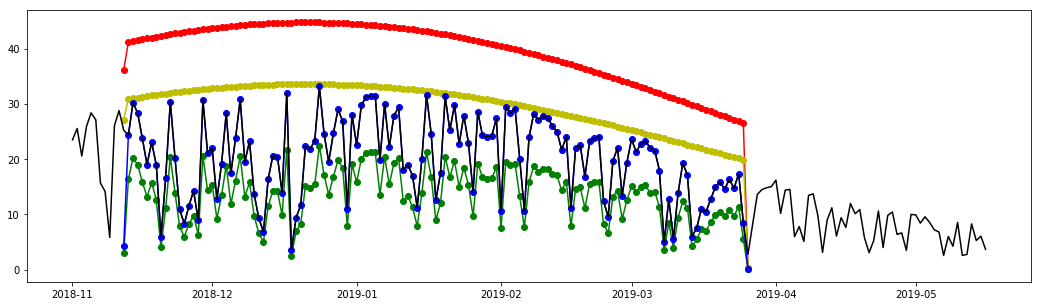

In [264]:
figure = plt.figure(figsize=(18,5))
plt.plot(Data.RnMJ.resample('D').sum(),'-o',color='g')
plt.plot(Data.Rex.resample('D').sum(),'-o',color='r')
plt.plot(Data.So.resample('D').sum(),'-o',color='y')
plt.plot(Data.IncomingRadnMJ.resample('D').sum(),'-o',color='b')
plt.plot(Broadfields.IncomingRadnMJ.loc['2018-11-01':'2019-05-16'], color = 'k')

### Net radiation data all looks good

### Convert to W/m2 by dividing by the period duration in seconds

In [265]:
def calcRnW(RnMJseries,DurationSeries):
    Return = []
    for x in RnMJseries.index:
        if DurationSeries.loc[x][0] == 0:
            Return.append(0)
        else:
            Return.append((RnMJseries.loc[x][0]*1000000)/(DurationSeries.loc[x][0]*3600)) #Multiply by a million to convert to jouls and by 3600 to convert from hours to seconds
    return Return    

In [266]:
Data[('RnW','Expt','Expt','Expt')] = calcRnW(Data.loc[:,'RnMJ'],Data.loc[:,'Duration'])

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2903: PerformanceWarning: indexing past lexsort depth may impact performance.
  if self.run_code(code, result):


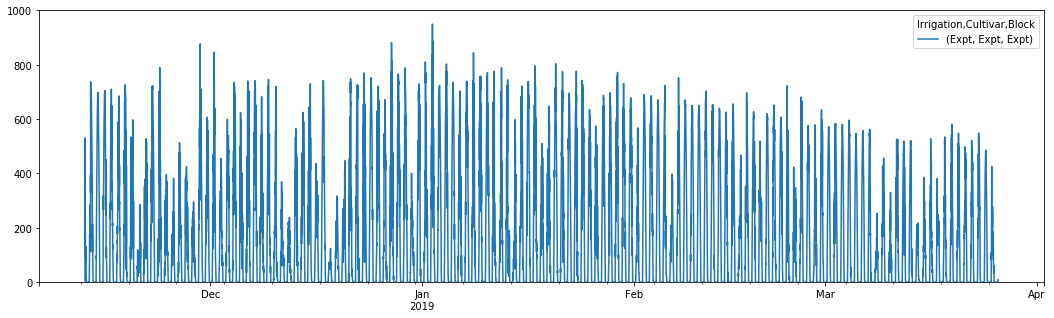

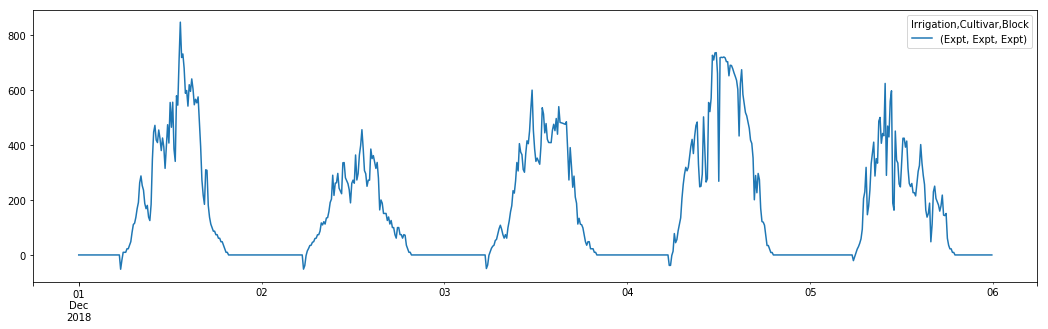

In [268]:
Data.RnW.plot(figsize = (18,5),ylim=(0,1000))
Data.RnW.loc['2018-12-1':'2018-12-5'].plot(figsize = (18,5))

### Instanious net radiation data looks sensible

In [269]:
Data.to_pickle('.\DataFrames\TempAndMet.pkl')

In [270]:
Data.loc[DaylightIndex,'IR_SurfaceTemp'].resample('D').mean().to_pickle('.\DataFrames\DailyTs.pkl')
Data.loc[DaylightIndex,'AirTemperature'].resample('D').mean().to_pickle('.\DataFrames\DailyTa.pkl')
Data.loc[DaylightIndex,'VPD'].resample('D').mean().to_pickle('.\DataFrames\DailyEd.pkl')
Data.loc[DaylightIndex,'IncomingRadnMJ'].resample('D').sum().to_pickle('.\DataFrames\DailyRs.pkl')
Data.loc[DaylightIndex,'VP'].resample('D').mean().to_pickle('.\DataFrames\DailyEa.pkl')
Data.loc[DaylightIndex,'Windspeed'].resample('D').mean().to_pickle('.\DataFrames\Dailyu.pkl')